# API Key 발급
- RapidAPI = https://rapidapi.com/developer/security/Translator
- Naver = https://developers.naver.com/apps/#/myapps/i5a70PF_MHp_3II3EfZ3/overview

In [6]:
rapid_key = '**'
naver_id = '**'
naver_pw = '**'

# TLDRThis
- https://rapidapi.com/tldrthishq-tldrthishq-default/api/tldrthis/
- Human Like, Extractive
1. Abstractive(Human LIke)
> Abstracive summarization은 기존 input을 그래도 인용하지 않고 새롭게 파싱하여 summary를 생성
2. Extractive
> Input에 존재하는 중요한 단어를 그래도 사용한다.

In [7]:
import requests
from pprint import pprint
#오픈 API를 사용하기 위한 툴

# 사용법
아래와 같이 사용한다.
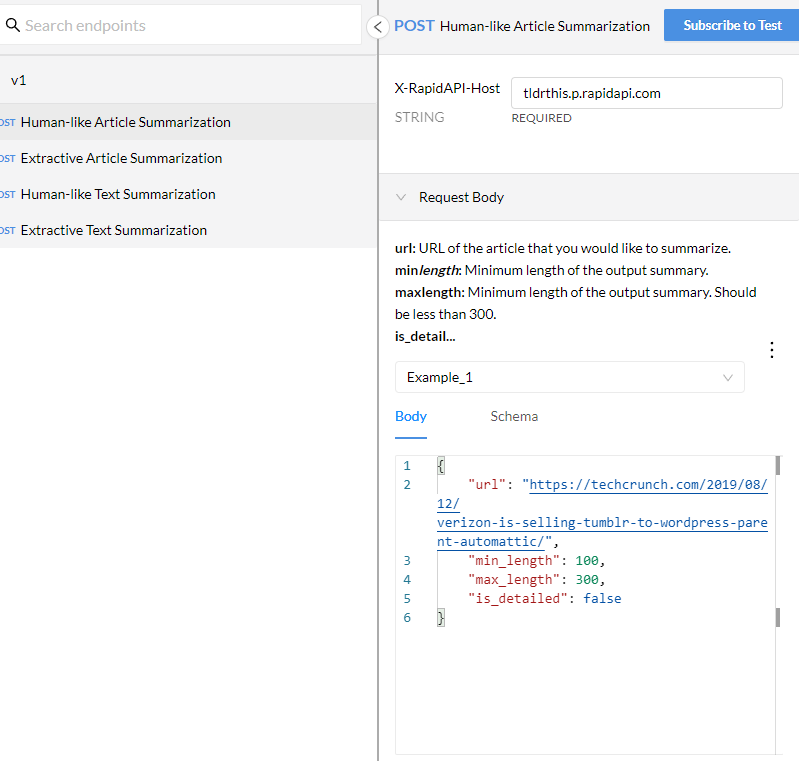
- url에 주소를 입력한다.
- min, max length를 통해 최소 최대 길이를 입력한다.
- is_detailed를 통해 한 문장으로 만들지를 선택한다.

In [9]:
url = "https://tldrthis.p.rapidapi.com/v1/model/abstractive/summarize-url/"

payload = {
    "url": "https://arxiv.org/pdf/1706.03762.pdf", #주소 입력
    "min_length" : 100, #최소길이
    "max_length" : 300, # 최대길이
    "is_detailed" : False #문장으로 변환
}

headers = {
    "content-type": "application/json",
    "X-RapidAPI-Key": rapid_key,
    "X-RapidAPI-Host": "tldrthis.p.rapidapi.com"
}

response = requests.request("POST", url, json=payload, headers=headers)

pprint(response.json())

{'article_abstract': 'The dominant sequence transduction models are based on '
                     'complex recurrent or convolutional neural networks that '
                     'include an encoder and a decoder. The best performing '
                     'models also connect the encoder and decoder through an '
                     'attention mechanism. We propose a new simple network '
                     'architecture, the Transformer, based solely on attention '
                     'mechanisms, dispensing with recurrence and convolutions '
                     'entirely. Experiments on two machine translation tasks '
                     'show these models to be superior in quality while being '
                     'more parallelizable and requiring significantly less '
                     'time to train. Our model achieves 28.4 BLEU on the WMT '
                     '2014 Englishto-German translation task, improving over '
                     'the existing best results, inc

In [10]:
summary = response.json()['summary'][0].strip()
print(summary)

We propose a new simple network architecture, the Transformer, based solely on attention mechanisms. Experiments on two machine translation tasks show these models to be superior in quality while being more parallelizable and requiring significantly less time to train. The Transformer allows for significantly more parallelization and can reach a new state-of-the-art in translation quality after being trained for as little as twelve hours on eight P100 GPUs. The goal of reducing sequential computation also forms the foundation of the Extended Neural GPU [16], ByteNet [18] and ConvS2S.


# 번역
네이버 파파고 API 사용

In [13]:
url = "https://openapi.naver.com/v1/papago/n2mt"

payload = {
    'source' : "en",
    'target' : 'ko',
    'text' : summary,
}
headers = {
    "content-type": "application/json",
    "X-Naver-Client-Id": naver_id,
    "X-Naver-Client-Secret": naver_pw,
}

response = requests.request("POST", url, json=payload, headers=headers)

pprint(response.json())

{'message': {'@service': 'naverservice.nmt.proxy',
             '@type': 'response',
             '@version': '1.0.0',
             'result': {'dict': None,
                        'engineType': 'UNDEF_MULTI_SENTENCE',
                        'pivot': None,
                        'srcLangType': 'en',
                        'tarDict': None,
                        'tarLangType': 'ko',
                        'translatedText': '우리는 주의 메커니즘만을 기반으로 하는 새로운 간단한 네트워크 '
                                          '아키텍처인 Transformer를 제안한다. 두 가지 기계 번역 '
                                          '작업에 대한 실험은 이러한 모델이 품질이 우수하면서도 병렬이 '
                                          '가능하고 교육 시간이 훨씬 적게 소요된다는 것을 보여준다. '
                                          'Transformer는 훨씬 더 많은 병렬화를 허용하고 8개의 '
                                          'P100 GPU에서 12시간만 훈련하면 번역 품질에서 새로운 '
                                          '최첨단 기술을 얻을 수 있다. 순차 계산을 줄이는 목표는 또한 '
                                          '확장 신경 GPU[1

In [14]:
print(response.json()['message']['result']['translatedText'])

우리는 주의 메커니즘만을 기반으로 하는 새로운 간단한 네트워크 아키텍처인 Transformer를 제안한다. 두 가지 기계 번역 작업에 대한 실험은 이러한 모델이 품질이 우수하면서도 병렬이 가능하고 교육 시간이 훨씬 적게 소요된다는 것을 보여준다. Transformer는 훨씬 더 많은 병렬화를 허용하고 8개의 P100 GPU에서 12시간만 훈련하면 번역 품질에서 새로운 최첨단 기술을 얻을 수 있다. 순차 계산을 줄이는 목표는 또한 확장 신경 GPU[16], 바이트넷[18] 및 ConvS2S의 기초를 형성한다.


# 함수화

In [15]:
def summarize_and_translate(article_url, min_length=100, max_length=300):
    url = "https://tldrthis.p.rapidapi.com/v1/model/abstractive/summarize-url/"

    payload = {
        "url": article_url, # 주소
        "min_length": min_length, # 최소 길이
        "max_length": max_length, # 최대 길이
        "is_detailed": False # 한 문장으로 반환할 것인지 여부
    }

    headers = {
        "content-type": "application/json",
        "X-RapidAPI-Key": rapid_key,
        "X-RapidAPI-Host": "tldrthis.p.rapidapi.com"
    }

    response = requests.request("POST", url, json=payload, headers=headers)

    summary = response.json()['summary'][0].strip()
    
    url = "https://openapi.naver.com/v1/papago/n2mt"

    payload = {
        "source": "en",
        "target": "ko",
        "text": summary,
    }

    headers = {
        "content-type": "application/json",
        "X-Naver-Client-Id": naver_id,
        "X-Naver-Client-Secret": naver_pw
    }

    response = requests.request("POST", url, json=payload, headers=headers)
    
    return response.json()['message']['result']['translatedText']

In [16]:
summarize_and_translate("https://arxiv.org/pdf/1706.03762.pdf", 50, 100)

'우리는 주의 메커니즘만을 기반으로 하는 새로운 간단한 네트워크 아키텍처인 Transformer를 제안한다. 두 가지 기계 번역 작업에 대한 실험은 이러한 모델이 품질이 우수하면서도 병렬이 가능하고 교육 시간이 훨씬 적게 소요된다는 것을 보여준다. 트랜스포머는 훨씬 더 많은 병렬화를 허용하고 8개의 P100에서 12시간 정도만 교육을 받은 후 번역 품질에서 새로운 첨단 기술에 도달할 수 있습니다.'